In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    "Area": [
        6274, 6689, 4276, 5130, 6035, 2946, 4727, 6873,
        3911, 5689, 5459, 4508, 3589, 7212, 7454, 3366
    ],
    "Rooms": [
        8, 5, 8, 9, 6, 1, 10, 7,
        4, 5, 5, 4, 8, 3, 9, 6
    ],
    "Price": [
        2100, 2200, 1400, 1700, 2000, 1000, 1600, 2300,
        1300, 1900, 1800, 1500, 1200, 2400, 2500, 1100
    ]
}


df = pd.DataFrame(data)

In [3]:
X = df[['Area', 'Rooms']].values
y = df['Price'].values
m = X.shape[0]
X = np.c_[np.ones(m), X]

In [4]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [14]:
def gradient_descent(X, y, lr=1e-8, epochs=5000):
    m, n = X.shape
    weights = np.zeros(n)
    losses = []

    for _ in range(epochs):
        y_pred = X @ weights
        error = y_pred - y
        gradient = (2 / m) * (X.T @ error)
        weights -= lr * gradient
        losses.append(mse(y, y_pred))

    return weights, losses

In [15]:
weights, losses = gradient_descent(X, y)

print("Learned weights:", weights)

Learned weights: [3.02006853e-05 3.32840924e-01 7.38521389e-04]


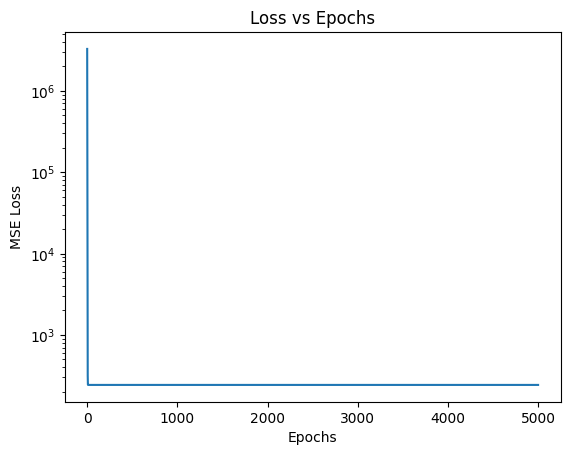

In [17]:
plt.plot(losses)
plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss vs Epochs")
plt.show()

In [18]:

area = int(input("Enter area of the house: "))
rooms = int(input("Enter number of rooms: "))



new_house = np.array([[1, area, rooms]])
predicted_price = new_house @ weights

print("Predicted Price:", predicted_price[0])

Enter area of the house: 3000
Enter number of rooms: 5
Predicted Price: 998.526495540606
